In [75]:
import pandas as pd
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import os
import random
import imageio
from PIL import Image

DATASET_PATH ="lfw_dataset/"
ATTRIBUTES_PATH = "lfw_attributes.txt"

In [76]:
dataset = []
for path in sorted(glob(os.path.join(DATASET_PATH, "**", "*.jpg"))):
    person = path.split("/")[-2]
    dataset.append({"person":person, "path": path})
    
dataset = pd.DataFrame(dataset)

dataset.tail(10)

,person,path
13223,Zoe_Ball,lfw_dataset/Zoe_Ball/Zoe_Ball_0001.jpg
13224,Zoran_Djindjic,lfw_dataset/Zoran_Djindjic/Zoran_Djindjic_0001...
13225,Zoran_Djindjic,lfw_dataset/Zoran_Djindjic/Zoran_Djindjic_0002...
13226,Zoran_Djindjic,lfw_dataset/Zoran_Djindjic/Zoran_Djindjic_0003...
13227,Zoran_Djindjic,lfw_dataset/Zoran_Djindjic/Zoran_Djindjic_0004...
13228,Zorica_Radovic,lfw_dataset/Zorica_Radovic/Zorica_Radovic_0001...
13229,Zulfiqar_Ahmed,lfw_dataset/Zulfiqar_Ahmed/Zulfiqar_Ahmed_0001...
13230,Zumrati_Juma,lfw_dataset/Zumrati_Juma/Zumrati_Juma_0001.jpg
13231,Zurab_Tsereteli,lfw_dataset/Zurab_Tsereteli/Zurab_Tsereteli_00...
13232,Zydrunas_Ilgauskas,lfw_dataset/Zydrunas_Ilgauskas/Zydrunas_Ilgaus...


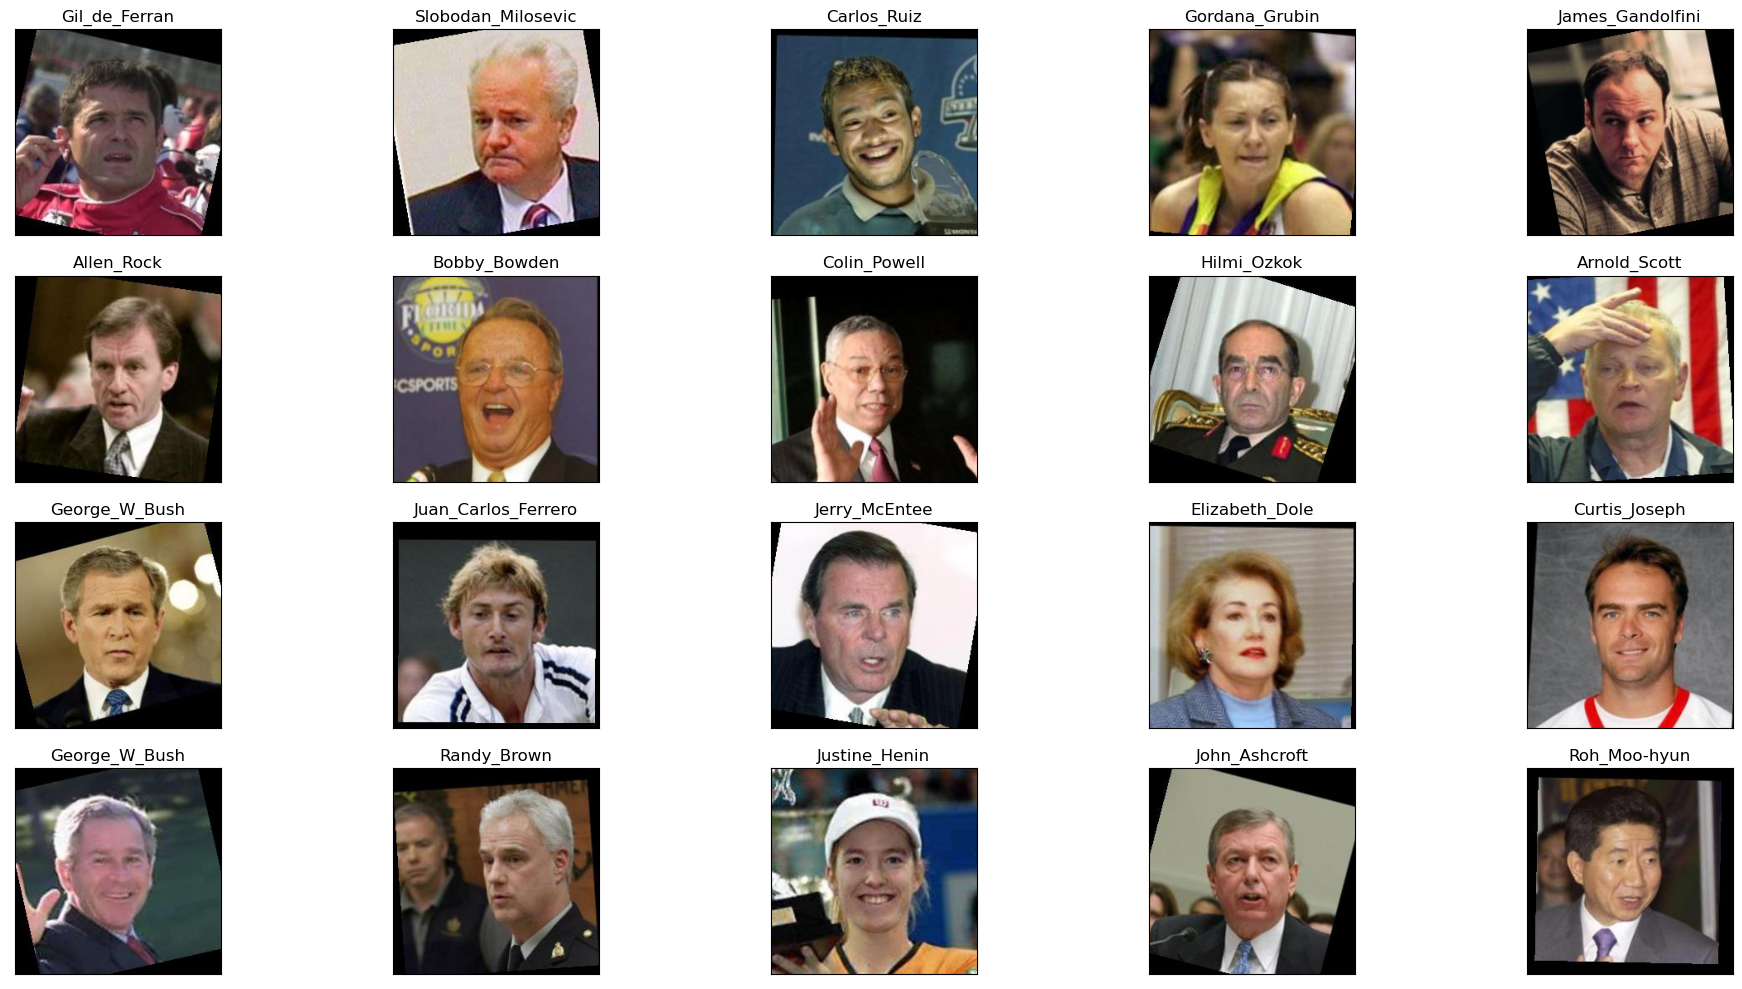

In [77]:
plt.figure(figsize=(20,10))
for i in range(20):
    idx = random.randint(0, len(dataset))
    img = plt.imread(dataset.path.iloc[idx])
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.title(dataset.person.iloc[idx])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [78]:
def fetch_dataset():
    
    df_attrs = pd.read_csv(ATTRIBUTES_PATH, sep='\t', skiprows=1,) 
    df_attrs = pd.DataFrame(df_attrs.iloc[:,:-1].values, columns = df_attrs.columns[1:])

    photo_ids = []
    for dirpath, _, filenames in os.walk(DATASET_PATH):
        for fname in filenames:
            if fname.endswith(".jpg"):
                fpath = os.path.join(dirpath,fname)
                photo_id = fname[:-4].replace('_',' ').split()
                person_id = ' '.join(photo_id[:-1])
                photo_number = int(photo_id[-1])
                photo_ids.append({'person':person_id, 'imagenum':photo_number, 'photo_path':fpath})

    photo_ids = pd.DataFrame(photo_ids)
    df = pd.merge(df_attrs, photo_ids, on=('person', 'imagenum'))

    assert len(df)==len(df_attrs),"lost some data when merging dataframes"
    
    images = df['photo_path'].apply(imageio.imread)\
                                .apply(lambda img: np.array(Image.fromarray(img).resize([250, 250])) )

    images = np.stack(images.values).astype('uint8')
    attrs = df.drop(["photo_path", "imagenum"],axis=1)
    
    return images, attrs

In [79]:
images, attrs = fetch_dataset()

In [80]:
attrs

,person,Male,Asian,White,Black,Baby,Child,Youth,Middle Aged,Senior,...,Pale Skin,5 o' Clock Shadow,Strong Nose-Mouth Lines,Wearing Lipstick,Flushed Face,High Cheekbones,Brown Eyes,Wearing Earrings,Wearing Necktie,Wearing Necklace
0,Aaron Eckhart,1.568346,-1.889043,1.737203,-0.929729,-1.471799,-0.19558,-0.835609,-0.351468,-1.012533,...,0.361738,1.166118,-1.164916,-1.13999,-2.371746,-1.299932,-0.414682,-1.144902,0.694007,-0.826609
1,Aaron Guiel,0.169851,-0.982408,0.422709,-1.282184,-1.36006,-0.867002,-0.452293,-0.197521,-0.956073,...,-0.832036,-0.39768,0.87416,-0.945431,-0.268649,-0.006244,-0.030406,-0.480128,0.66676,-0.496559
2,Aaron Patterson,0.997749,-1.364195,-0.157377,-0.756447,-1.891825,-0.871526,-0.862893,0.031445,-1.341523,...,1.549743,1.884745,-0.999765,-1.359858,-1.912108,-1.095634,0.915126,-0.572332,0.144262,-0.841231
3,Aaron Peirsol,1.122719,-1.997799,1.916144,-2.514214,-2.580071,-1.404239,0.057551,0.000196,-1.273512,...,0.567822,-0.176089,1.108125,-1.600944,-3.264613,0.813418,0.308631,-0.848693,0.475941,-0.447025
4,Aaron Peirsol,1.078214,-2.008098,1.676211,-2.278056,-2.651845,-1.348408,0.649089,0.017656,-1.889111,...,-1.461474,-0.955283,0.119113,-1.128176,-3.161048,0.08268,-0.439614,-0.359859,-0.760774,-0.410152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13138,Zorica Radovic,-0.205363,-0.202842,-1.232735,-1.409125,-1.804858,0.287268,-0.521815,-0.789165,-1.008119,...,-0.867156,-0.879554,-0.179497,0.323676,-2.188852,-1.169369,0.924397,-0.217415,-0.414024,-0.495178
13139,Zulfiqar Ahmed,1.957472,-2.47247,-1.307994,-0.671636,-1.960125,-0.838803,-1.365955,0.510448,-1.262193,...,-2.487289,2.608861,-0.95419,-1.599463,-1.23822,-1.187034,1.87413,-0.832614,0.152785,-0.554331
13140,Zumrati Juma,-0.037001,-1.16415,0.228494,0.187503,-1.836475,-0.958412,-0.669697,-0.48033,0.493433,...,-1.938639,-0.49108,0.495067,-0.524767,-1.073731,0.11101,0.976262,-0.453027,-0.399981,-1.078655
13141,Zurab Tsereteli,0.282219,-0.396198,1.27047,-1.981209,-1.70294,-1.507203,-2.330721,-0.295928,1.056618,...,-0.662101,-1.692131,1.284772,-0.80818,-0.710051,0.694621,0.936065,-0.7675,1.14693,-0.26094


In [81]:
def plot_image(image, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title(attrs['person'][idx])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()

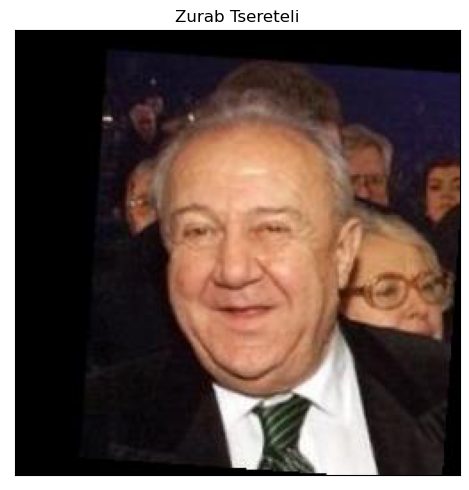

In [82]:
plot_image(images[13141], 13141)